## **Milestone 1 -  Basic Data Preprocessing for Image Classification** 

Autour: Xiaotian Han



In this milestone, you will implement the an automated deep learning model for image classification using the Task API of AutoKeras. The step is listed as follows:

1. Load and prepare cifar10 dataset
2. Image dataset preprocessing
3. Build and train the deep learning model


Intructions:
1. You should complete the code in # Your code here
2. The output of the cell is the expected output of the code 

In [1]:
%%capture
#!pip install tensorflow==2.4.1
#!pip install autokeras==1.0.12

In [2]:
# import the python packages

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Layer, Dense, ReLU, Softmax, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import random_rotation, random_shift, random_brightness
from sklearn.model_selection import train_test_split


import autokeras as ak

print( "tf.__version__:", tf.__version__ )
print( "ak.__version__:", ak.__version__ )

tf.__version__: 2.4.1
ak.__version__: 1.0.12


In [3]:
# This fix an issue with TensorFlow 2.4.1 reported here https://github.com/tensorflow/tensorflow/issues/43174
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Load and prepare CIFAR10 dataset

#### Load dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


#### Data preprocssing

We pick up an horse image to illustrate the image data preprocessing, including the following:
1. Flip
2. Shift
3. Rotation
4. Shear
5. Zoom


##### Original images

(-0.5, 31.5, 31.5, -0.5)

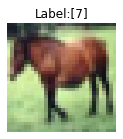

In [5]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

# Plot the orignal figure
plt.figure( figsize=(2,2) )
plt.tight_layout()
plt.imshow(x_train[7].reshape(32,32,3), interpolation='none')
plt.title("Label:{}".format(y_train[7]))
plt.axis('off')

##### Flip

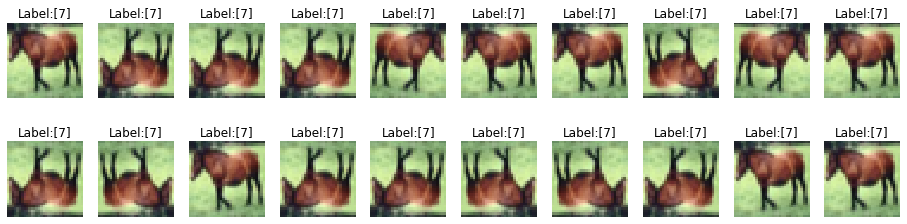

In [6]:
# Flip image horizontally or vertically
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

# Instantiate an ImageDataGenerator which can flip the image
image_aug = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip = True
        )


plt.figure( figsize=(16,4) )
plt.tight_layout()
for i in range(20):
    plt.subplot(2,10,i+1)
    image = x_train[7]
    image = image_aug.random_transform( image )
    plt.imshow(image, interpolation='none')
    plt.title("Label:{}".format(y_train[7]))
    plt.axis('off')

##### Shift

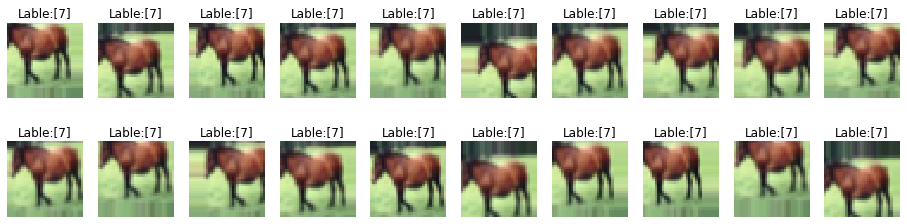

In [7]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

# Instantiate an ImageDataGenerator which can shift the image

image_aug = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        )

plt.figure( figsize=(16,4) )
plt.tight_layout()
for i in range(20):
    plt.subplot(2,10,i+1)
    image = x_train[7]
    # image = random_rotation( image, rg = 100, row_axis=0, col_axis=1, channel_axis=2 )
    # image = ImageDataGenerator().apply_transform( image,  {"flip_horizontal": True})
    # image = ImageDataGenerator().apply_transform( image,  {"theta": 30})
    # print( image_aug.get_random_transform(image.shape) )
    image = image_aug.random_transform( image )
    # print( image )
    plt.imshow(image, interpolation='none')
    plt.title("Lable:{}".format(y_train[7]))
    plt.axis('off')

##### Rotation

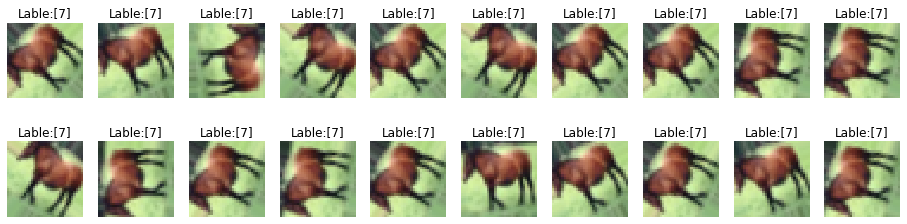

In [8]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

# Instantiate an ImageDataGenerator which can rotate the image

image_aug = ImageDataGenerator(
        rotation_range=90,
        )

plt.figure( figsize=(16,4) )
plt.tight_layout()
for i in range(20):
    plt.subplot(2,10,i+1)
    image = x_train[7]
    # image = random_rotation( image, rg = 100, row_axis=0, col_axis=1, channel_axis=2 )
    # image = ImageDataGenerator().apply_transform( image,  {"flip_horizontal": True})
    # image = ImageDataGenerator().apply_transform( image,  {"theta": 30})
    # print( image_aug.get_random_transform(image.shape) )
    image = image_aug.random_transform( image )
    # print( image )
    plt.imshow(image, interpolation='none')
    plt.title("Lable:{}".format(y_train[7]))
    plt.axis('off')

##### Shear

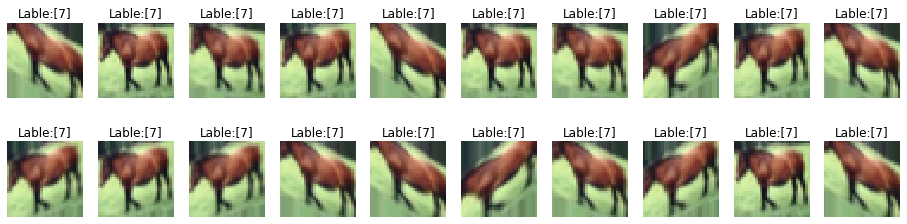

In [9]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

# Instantiate an ImageDataGenerator which can shear the image

image_aug = ImageDataGenerator(
        shear_range=50,
        )


plt.figure( figsize=(16,4) )
plt.tight_layout()
for i in range(20):
    plt.subplot(2,10,i+1)
    image = x_train[7]
    # image = random_rotation( image, rg = 100, row_axis=0, col_axis=1, channel_axis=2 )
    # image = ImageDataGenerator().apply_transform( image,  {"flip_horizontal": True})
    # image = ImageDataGenerator().apply_transform( image,  {"theta": 30})
    # print( image_aug.get_random_transform(image.shape) )
    image = image_aug.random_transform( image )
    # print( image )
    plt.imshow(image, interpolation='none')
    plt.title("Lable:{}".format(y_train[7]))
    plt.axis('off')

##### Image Zoom

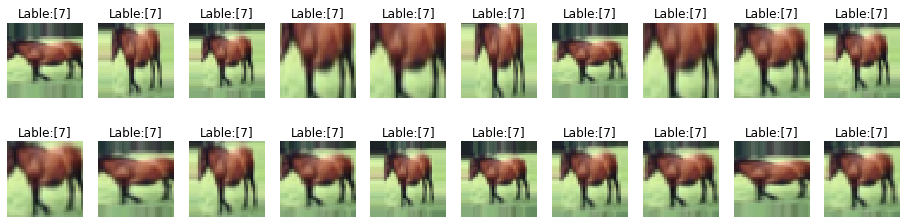

In [10]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

# Instantiate an ImageDataGenerator which can zoom in or out the image

image_aug = ImageDataGenerator(
        zoom_range=[0.5,1.5],
        )


plt.figure( figsize=(16,4) )
plt.tight_layout()
for i in range(20):
    plt.subplot(2,10,i+1)
    image = x_train[7]
    # image = random_rotation( image, rg = 100, row_axis=0, col_axis=1, channel_axis=2 )
    # image = ImageDataGenerator().apply_transform( image,  {"flip_horizontal": True})
    # image = ImageDataGenerator().apply_transform( image,  {"theta": 30})
    # print( image_aug.get_random_transform(image.shape) )
    image = image_aug.random_transform( image )
    # print( image )
    plt.imshow(image, interpolation='none')
    plt.title("Lable:{}".format(y_train[7]))
    plt.axis('off')

## Build deep learning model with Keras

#### Prepare data

In [11]:
# Load dataset
num_classes = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)


x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.2, random_state=1314)


print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Validation image shape:', x_val.shape)
print('Validation label shape:', y_val.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (40000, 32, 32, 3)
Training label shape: (40000, 1)
Validation image shape: (10000, 32, 32, 3)
Validation label shape: (10000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


In [12]:
# Instantiate an ImageDataGenerator with the combination of the above image data augmentations
# Your code here
datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip = True,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        # zoom_range=[0.5,1.5],
        # shear_range=50,
        )

#### Build model with AutoKeras Task API

In [13]:
inputs = Input( shape=(32, 32, 3) )
x = Conv2D(32, 3, activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, 3, activation='relu')(x)     
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)
cnn_model = Model(inputs, outputs, name = "cnn_model")
cnn_model.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0 

In [14]:
# Compile the model and train the model
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epochs = 10
for epoch in range( epochs ):
  print( "Epoch {}/{}".format( epoch+1, epochs ) )
  
  # Data preprocessing for evert epoch
  for i in range( x_train.shape[0] ):
    x_train[ i ] = image_aug.random_transform( x_train[ i ] )
  
  # Train cnn_model
  cnn_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=5, batch_size=64)

Epoch 1/10
Epoch 1/5
625/625 [==============================] - 38s 8ms/step - loss: 1.9515 - accuracy: 0.2727 - val_loss: 1.5362 - val_accuracy: 0.4508
Epoch 2/5
625/625 [==============================] - 3s 5ms/step - loss: 1.5367 - accuracy: 0.4435 - val_loss: 1.3182 - val_accuracy: 0.5299
Epoch 3/5
625/625 [==============================] - 3s 5ms/step - loss: 1.3926 - accuracy: 0.5095 - val_loss: 1.2258 - val_accuracy: 0.5632
Epoch 4/5
625/625 [==============================] - 3s 5ms/step - loss: 1.2834 - accuracy: 0.5454 - val_loss: 1.1509 - val_accuracy: 0.5929
Epoch 5/5
625/625 [==============================] - 3s 5ms/step - loss: 1.2020 - accuracy: 0.5738 - val_loss: 1.0730 - val_accuracy: 0.6207
Epoch 2/10
Epoch 1/5
625/625 [==============================] - 3s 5ms/step - loss: 1.3199 - accuracy: 0.5315 - val_loss: 1.2149 - val_accuracy: 0.5741
Epoch 2/5
625/625 [==============================] - 3s 5ms/step - loss: 1.2549 - accuracy: 0.5573 - val_loss: 1.1557 - val_accurac

#### Explore Model

In [15]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.0942 - accuracy: 0.4865
Test loss:  3.0942208766937256
Test accuracy:  0.48649999499320984
